In [3]:
import pandas as pd
import matplotlib as plt

path = "train.csv"
df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA


<Axes: xlabel='Sex'>

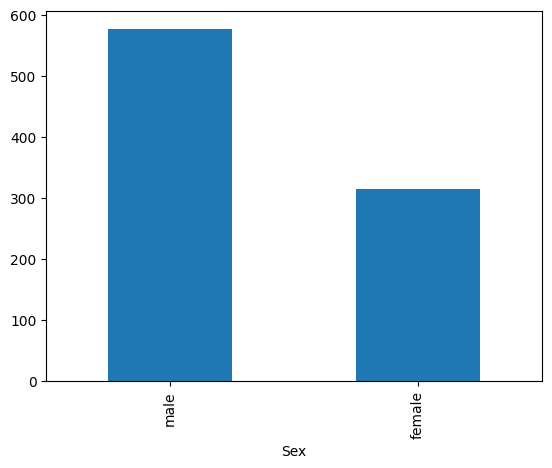

In [60]:
df.loc[:,['Sex','Survived']].value_counts()

df.Sex.value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

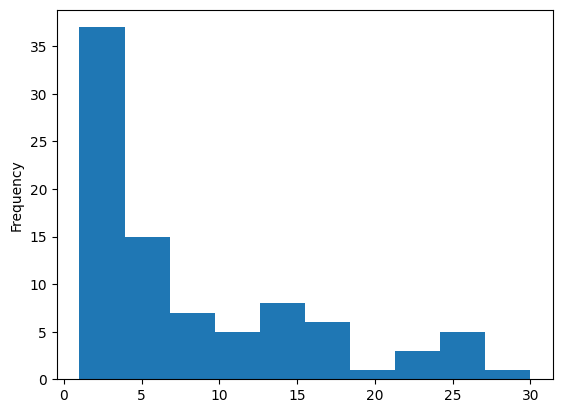

In [61]:
df.Age.value_counts().plot(kind = 'hist')

In [62]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
import numpy as np

df_age = df['Age'].fillna(df['Age'].median())
df_age.max()
# df_age.median()
df["Age"] = df_age
np.max(df["Age"])

np.float64(80.0)

Clean with kNN

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
age_imputed = imputer.fit_transform(df[["Age"]])
df["Age"] = age_imputed

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

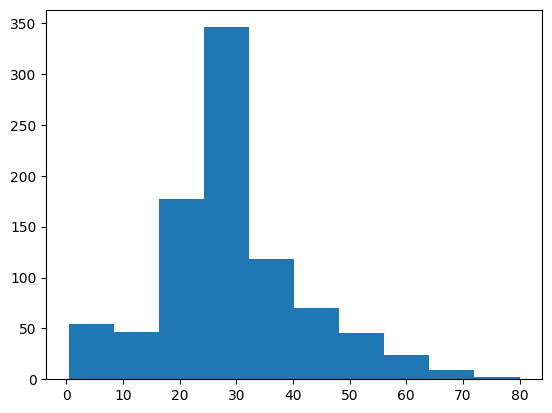

In [6]:
import matplotlib.pyplot as plt

plt.hist(df["Age"])

In [7]:
df.head()

df = df.drop(["Ticket", "Fare", "Cabin","Embarked","Name"],axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0
887,888,1,1,female,19.000000,0,0
888,889,0,3,female,29.699118,1,2
889,890,1,1,male,26.000000,0,0


In [66]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


Check NaN

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

onehot_encoder.fit(df[["Sex"]])
gender_encoded = onehot_encoder.transform(df[["Sex"]]).toarray()
gender_encoded

df[["Female","Male"]] = gender_encoded
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Female,Male
0,1,0,3,male,22.000000,1,0,0.0,1.0
1,2,1,1,female,38.000000,1,0,1.0,0.0
2,3,1,3,female,26.000000,0,0,1.0,0.0
3,4,1,1,female,35.000000,1,0,1.0,0.0
4,5,0,3,male,35.000000,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,0.0,1.0
887,888,1,1,female,19.000000,0,0,1.0,0.0
888,889,0,3,female,29.699118,1,2,1.0,0.0
889,890,1,1,male,26.000000,0,0,0.0,1.0


In [10]:
df = df.drop(["Sex","Female"],axis = 1)

In [11]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Male
0,1,0,3,22.000000,1,0,1.0
1,2,1,1,38.000000,1,0,0.0
2,3,1,3,26.000000,0,0,0.0
3,4,1,1,35.000000,1,0,0.0
4,5,0,3,35.000000,0,0,1.0
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,1.0
887,888,1,1,19.000000,0,0,0.0
888,889,0,3,29.699118,1,2,0.0
889,890,1,1,26.000000,0,0,1.0


In [12]:
from sklearn.model_selection import train_test_split
test_url = "test.csv"
df_test = pd.read_csv(test_url)

x_train = df[["Pclass", "Age", "SibSp", "Parch", "Male"]]
y_train = df["Survived"]

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 87)

In [15]:
onehot_encoder.fit(df_test[["Sex"]])
encoded_gender = onehot_encoder.transform(df_test[["Sex"]]).toarray()
encoded_gender


df_test[["Female", "Male"]] = encoded_gender

df_test.drop(["Name","Ticket","Fare","Cabin","Embarked", "Sex", "Female"],axis = 1)
x_test = df_test[["Pclass","Age","SibSp","Parch","Male"]]
x_test.isna().sum()


Pclass     0
Age       86
SibSp      0
Parch      0
Male       0
dtype: int64

In [ ]:
x_test["Age"] = x_test["Age"].fillna(x_test["Age"].median())
x_test.isna().sum()

In [18]:
age_imputed = imputer.fit_transform(x_test[['Age']])
x_test["Age"] = age_imputed


C:\Users\Owi Sze Jay\AppData\Local\Temp\ipykernel_18892\2383397514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Age"] = age_imputed


<function matplotlib.pyplot.show(close=None, block=None)>

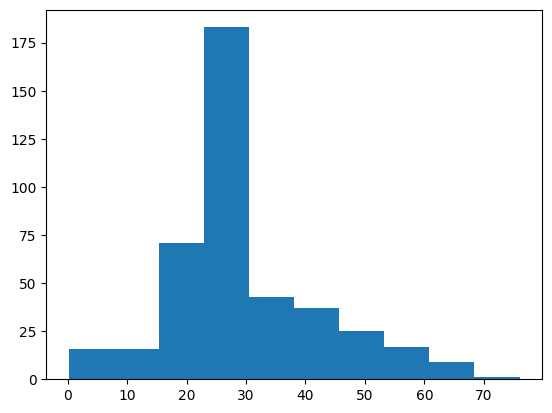

In [14]:
plt.hist(x_test["Age"])
plt.show

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

logreg = LogisticRegression()

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

clf = GridSearchCV(logreg,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
best_clf = clf.fit(x_train,y_train)
best_clf.best_estimator_



Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Owi Sze Jay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Owi Sze Jay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Owi Sze Jay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p

LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')

In [51]:
# best_clf.fit(x_train,y_train)
y_pred = best_clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
data = {'PassengerId': df_test['PassengerId'].values,
        'Survived' : y_pred}
data

results = pd.DataFrame(data)
results


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
results.to_csv('titanic_prediction_v8_logreg_with_hyperparameters.csv', index= False)

SVM Modelling

In [34]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
data = {'PassengerId': df_test['PassengerId'].values,
        'Survived' : y_pred}
data

results = pd.DataFrame(data)
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [36]:
results.to_csv('titanic_prediction_v5_SVM.csv', index= False)

Random Forest Classfier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=87)

rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
data = {'PassengerId': df_test['PassengerId'].values,
        'Survived' : y_pred}
data

results = pd.DataFrame(data)
results
results.to_csv('titanic_prediction_v9_rf.csv', index= False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
